In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
from skimage import io
import seaborn as sns

In [2]:
#train_color = '/home/ayush/Instance_Segmentation/all/train_color'
#train_label = '/home/ayush/Instance_Segmentation/all/train_label'

sample_train_color = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_color'
sample_train_label = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label'

#sample_val_color = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_val_color'
#sample_val_label = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_val_label'

train_data_small_path = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/train_data_small.csv'
#val_data_small_path = '/home/ayush/Instance_Segmentation/all/Sample_Dataset/val_data_small.csv'

In [3]:
labelmap_target = {33:'car', 34:'motorbicycle', 35:'bicycle', 36:'person', 38:'truck', 39:'bus', 40:'tricycle'}

labelmap_all = {0:'others', 
            1:'rover', 
            17:'sky', 
            33:'car', 
            34:'motorbicycle', 
            35:'bicycle', 
            36:'person', 
            37:'rider', 
            38:'truck', 
            39:'bus', 
            40:'tricycle', 
            49:'road', 
            50:'siderwalk', 
            65:'traffic_cone', 
            66:'road_pile', 
            67:'fence', 
            81:'traffic_light', 
            82:'pole', 
            83:'traffic_sign', 
            84:'wall', 
            85:'dustbin', 
            86:'billboard', 
            97:'building', 
            98:'bridge', 
            99:'tunnel', 
            100:'overpass', 
            113:'vegatation', 
            161:'car_groups', 
            162:'motorbicycle_group', 
            163:'bicycle_group', 
            164:'person_group', 
            165:'rider_group', 
            166:'truck_group', 
            167:'bus_group', 
            168:'tricycle_group'}

In [4]:
train_data_small_df = pd.read_csv(train_data_small_path,sep='\t')
train_img_path = list(train_data_small_df['image_path'])
train_label_path = list(train_data_small_df['image_label_instance'])

train_img_path = [os.path.join(sample_train_color,x) for x in train_img_path]
train_label_path = [os.path.join(sample_train_label,x) for x in train_label_path]

/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_color/170908_072658086_Camera_5.jpg


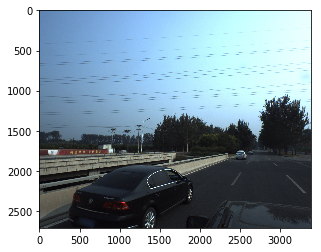

In [5]:
print(train_img_path[5000])
image = cv2.imread(train_img_path[5000])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/170908_072658086_Camera_5_instanceIds.png


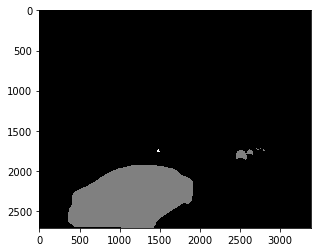

In [6]:
print(train_label_path[5000])
label_mask = cv2.imread(train_label_path[5000])
plt.imshow(cv2.cvtColor(label_mask, cv2.COLOR_BGR2RGB))
plt.show()

### Finding Number of Instances in Training Dataset

In [7]:
print(label_mask.shape)

(2710, 3384, 3)


In [8]:
def get_ims(impath):
    tlabel = io.imread(impath, plugin='pil')
    cls = np.unique(tlabel)
    unique,counts = np.unique(cls//1000, return_counts=True)
    ds = dict(zip(unique, counts))
    return ds

In [9]:
labelbag = bag.from_sequence(train_label_path).map(get_ims)
labels = labelbag.compute()

In [15]:
labels_df = pd.DataFrame(labels, index=train_label_path, dtype='uint8') # dtype not working?
labels_df.fillna(value=0, inplace=True)
labels_df = labels_df.astype(int)
labels_df.rename(columns=labelmap_all, inplace=True)      
labels_df.drop(columns=['others', 'rider', 'traffic_cone'], inplace=True)

#labels_df.to_csv('train_labels.csv')
labels_df.shape

(8212, 7)

In [16]:
labels_df.head(100)

,car,motorbicycle,bicycle,person,truck,bus,tricycle
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025742296_Camera_6_instanceIds.png,4,1,0,1,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025742517_Camera_6_instanceIds.png,5,1,0,1,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025742738_Camera_6_instanceIds.png,4,1,0,1,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025742959_Camera_6_instanceIds.png,4,0,0,0,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025743180_Camera_6_instanceIds.png,5,2,0,1,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025743401_Camera_6_instanceIds.png,4,0,0,1,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025743602_Camera_6_instanceIds.png,5,1,1,0,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025743803_Camera_6_instanceIds.png,5,2,0,0,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025744004_Camera_6_instanceIds.png,5,2,1,0,1,0,0
/home/ayush/Instance_Segmentation/all/Sample_Dataset/sample_train_label/171206_025744205_Camera_6_instanceIds.png,5,2,1,1,1,0,0


### Plotting the distribution of the 7 Classes 

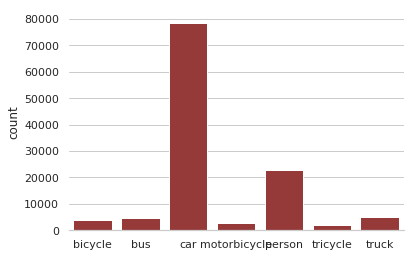

In [17]:
classes_df = pd.melt(labels_df)
groups = classes_df.groupby('variable')
sums = groups.sum()


sns.set(style='whitegrid')
ax = sns.barplot(x=sums.index, y=sums.value, color='brown')
ax.set(xlabel='', ylabel='count')
sns.despine(left=True)